<a href="https://colab.research.google.com/github/22130056-HoHoangDuy/Labs_ML/blob/main/22130056_HoHoangDuy_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler

In [144]:
 #Connect to Drive
 from google.colab import drive
 drive.mount('/content/gdrive')
 %cd '/content/gdrive/MyDrive/ML_Labs_Datasets'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML_Labs_Datasets


In [145]:
#Task1
df = pd.read_csv("dataset1.csv", encoding="latin1")

In [146]:
#Task1.1
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         73861 non-null  int64  
 1   Name           73859 non-null  object 
 2   URL            73861 non-null  object 
 3   Style          73265 non-null  object 
 4   StyleID        73861 non-null  int64  
 5   Size(L)        73861 non-null  float64
 6   OG             73861 non-null  float64
 7   FG             73861 non-null  float64
 8   ABV            73861 non-null  float64
 9   IBU            73861 non-null  float64
 10  Color          73861 non-null  float64
 11  BoilSize       73861 non-null  float64
 12  BoilTime       73861 non-null  int64  
 13  BoilGravity    70871 non-null  float64
 14  Efficiency     73861 non-null  float64
 15  MashThickness  43997 non-null  float64
 16  SugarScale     73861 non-null  object 
 17  BrewMethod     73861 non-null  object 
 18  PitchR

In [147]:
#Task1.2
missing_rates = df.isnull().mean() * 100
print(missing_rates)

general_missing_rate = df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100
print(f"General missing rate: {general_missing_rate:.2f}%")

BeerID            0.000000
Name              0.002708
URL               0.000000
Style             0.806921
StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       4.048144
Efficiency        0.000000
MashThickness    40.432705
SugarScale        0.000000
BrewMethod        0.000000
PitchRate        53.143066
PrimaryTemp      30.681957
PrimingMethod    90.847673
PrimingAmount    93.536508
UserId           68.358132
dtype: float64
General missing rate: 16.60%


In [148]:
#Task1.3
columns_to_drop = missing_rates[missing_rates > 50].index
df = df.drop(columns=columns_to_drop)
print(f"Dropped columns: {columns_to_drop}")

Dropped columns: Index(['PitchRate', 'PrimingMethod', 'PrimingAmount', 'UserId'], dtype='object')


In [149]:
#Task1.4
num_imputer = SimpleImputer(strategy="mean")
df[df.select_dtypes(include=[np.number]).columns] = num_imputer.fit_transform(df.select_dtypes(include=[np.number]))

In [150]:
#Task1.5
knn_imputer = KNNImputer(n_neighbors=5)
df[df.select_dtypes(include=[np.number]).columns] = knn_imputer.fit_transform(df.select_dtypes(include=[np.number]))

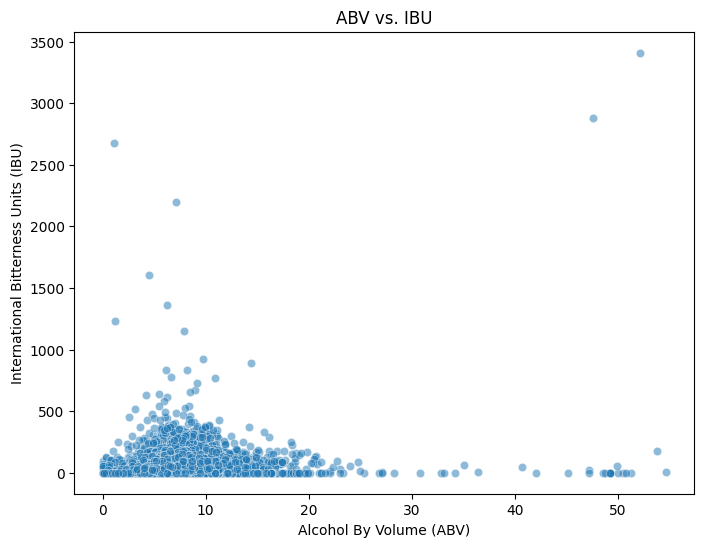

In [151]:
#Task1.6
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["ABV"], y=df["IBU"], alpha=0.5)
plt.xlabel("Alcohol By Volume (ABV)")
plt.ylabel("International Bitterness Units (IBU)")
plt.title("ABV vs. IBU")
plt.show()

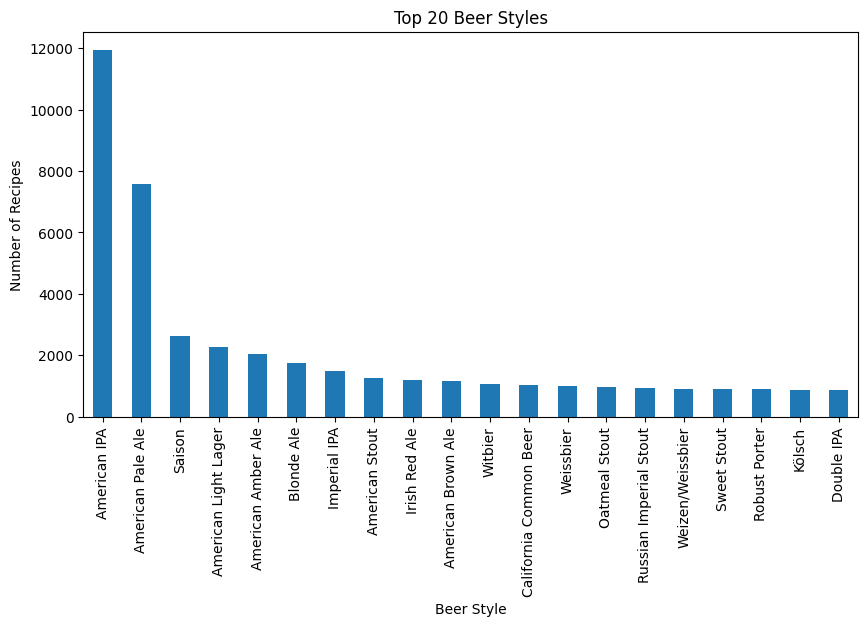

In [152]:
#Task1.7
plt.figure(figsize=(10,5))
df["Style"].value_counts().head(20).plot(kind='bar')
plt.xlabel("Beer Style")
plt.ylabel("Number of Recipes")
plt.title("Top 20 Beer Styles")
plt.xticks(rotation=90)
plt.show()

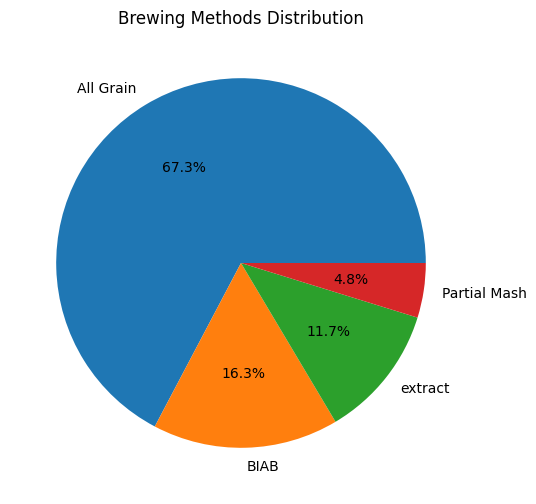

In [153]:
#Task1.8
plt.figure(figsize=(6,6))
df["BrewMethod"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Brewing Methods Distribution")
plt.ylabel("")
plt.show()

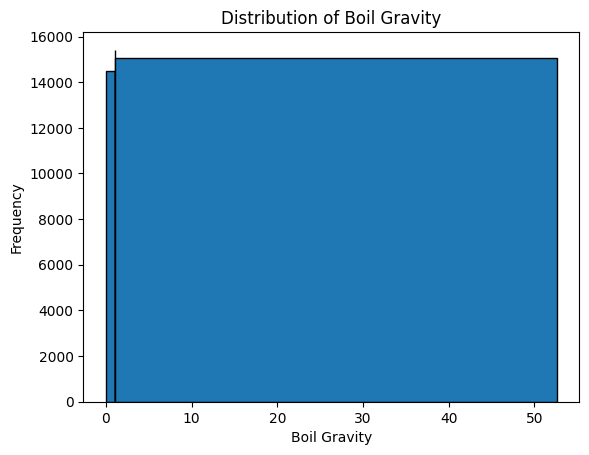

In [154]:
#Task1.9
df["BoilGravity_Binned"], bins = pd.qcut(df["BoilGravity"], q=5, labels=False, retbins=True)
plt.hist(df["BoilGravity"], bins=bins, edgecolor='black')
plt.xlabel("Boil Gravity")
plt.ylabel("Frequency")
plt.title("Distribution of Boil Gravity")
plt.show()

In [155]:
#Task1.10
df = pd.get_dummies(df, columns=["BrewMethod"], drop_first=True)

In [156]:
#Task1.11
scaler = StandardScaler()
df[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df.select_dtypes(include=[np.number]))

In [157]:
#Task1.12
print("Observations:")
print("- The dataset contains 176 different beer styles, but a few styles are much more popular.")
print("- There is a positive correlation between ABV and IBU: stronger beers tend to be more bitter.")
print("- Most recipes use the 'All Grain' brewing method.")
print("- The distribution of Boil Gravity suggests that certain gravity levels are preferred by brewers.")

Observations:
- The dataset contains 176 different beer styles, but a few styles are much more popular.
- There is a positive correlation between ABV and IBU: stronger beers tend to be more bitter.
- Most recipes use the 'All Grain' brewing method.
- The distribution of Boil Gravity suggests that certain gravity levels are preferred by brewers.


In [158]:
#Task2
df = pd.read_csv("dataset2.csv", encoding="latin1")

In [159]:
#Task2.1
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  307 non-null    int64  
 1   name                307 non-null    object 
 2   nationality         307 non-null    object 
 3   gender              307 non-null    object 
 4   ethnic.group        0 non-null      float64
 5   age                 307 non-null    int64  
 6   english.grade       307 non-null    float64
 7   math.grade          307 non-null    float64
 8   sciences.grade      307 non-null    float64
 9   language.grade      307 non-null    float64
 10  portfolio.rating    307 non-null    int64  
 11  coverletter.rating  307 non-null    float64
 12  refletter.rating    307 non-null    int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 31.3+ KB
None
               id  ethnic.group         age  english.grade  math.grade  \
count  307.000000 

In [160]:
#Task2.2
missing_rates = df.isnull().sum() / len(df) * 100
print("Tỷ lệ thiếu dữ liệu:\n", missing_rates)

Tỷ lệ thiếu dữ liệu:
 id                      0.0
name                    0.0
nationality             0.0
gender                  0.0
ethnic.group          100.0
age                     0.0
english.grade           0.0
math.grade              0.0
sciences.grade          0.0
language.grade          0.0
portfolio.rating        0.0
coverletter.rating      0.0
refletter.rating        0.0
dtype: float64


In [161]:
#Task2.3
df = df.drop(columns=missing_rates[missing_rates > 50].index)
print("Dữ liệu sau khi loại bỏ cột có quá nhiều giá trị thiếu:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  307 non-null    int64  
 1   name                307 non-null    object 
 2   nationality         307 non-null    object 
 3   gender              307 non-null    object 
 4   age                 307 non-null    int64  
 5   english.grade       307 non-null    float64
 6   math.grade          307 non-null    float64
 7   sciences.grade      307 non-null    float64
 8   language.grade      307 non-null    float64
 9   portfolio.rating    307 non-null    int64  
 10  coverletter.rating  307 non-null    float64
 11  refletter.rating    307 non-null    int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 28.9+ KB
Dữ liệu sau khi loại bỏ cột có quá nhiều giá trị thiếu:
 None


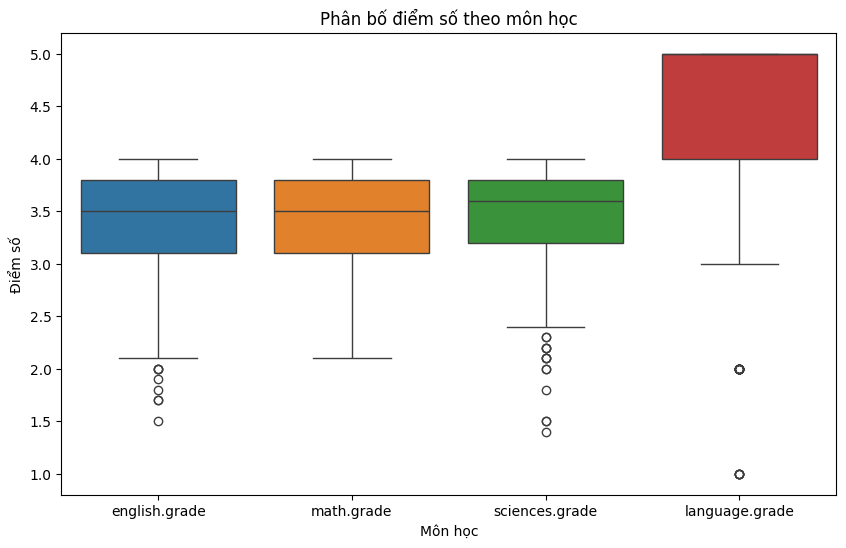

In [162]:
#Task2.4
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['english.grade', 'math.grade', 'sciences.grade', 'language.grade']])
plt.title("Phân bố điểm số theo môn học")
plt.xlabel("Môn học")
plt.ylabel("Điểm số")
plt.show()

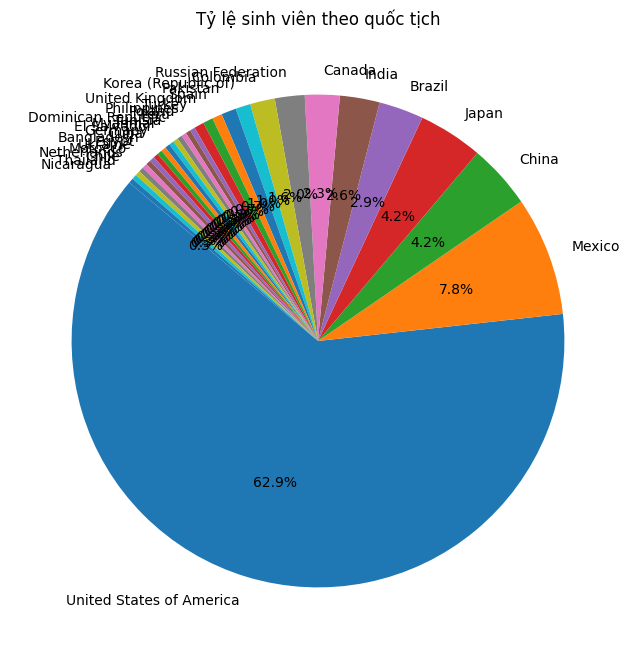

In [163]:
#Task2.5
nationality_counts = df["nationality"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(nationality_counts, labels=nationality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Tỷ lệ sinh viên theo quốc tịch")
plt.show()


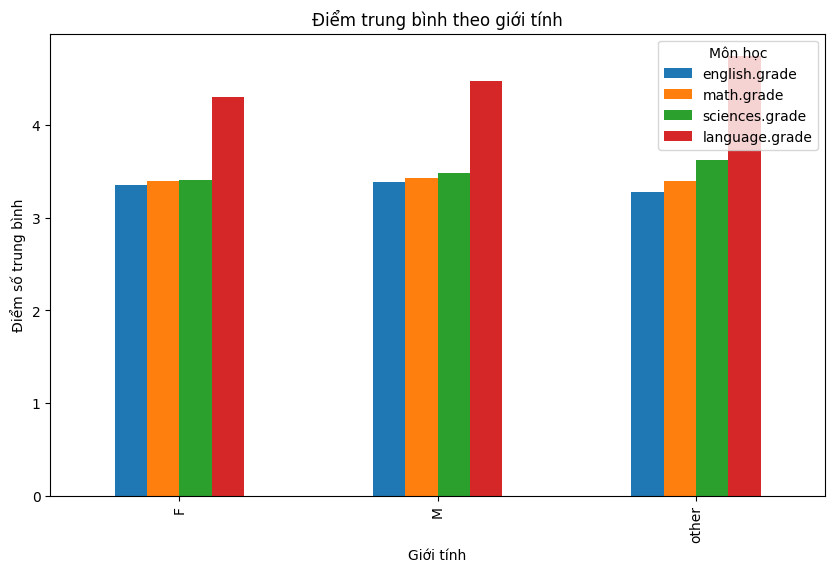

In [164]:
#Task2.6
avg_grades_by_gender = df.groupby("gender")[["english.grade", "math.grade", "sciences.grade", "language.grade"]].mean()

avg_grades_by_gender.plot(kind="bar", figsize=(10, 6))
plt.title("Điểm trung bình theo giới tính")
plt.ylabel("Điểm số trung bình")
plt.xlabel("Giới tính")
plt.legend(title="Môn học")
plt.show()

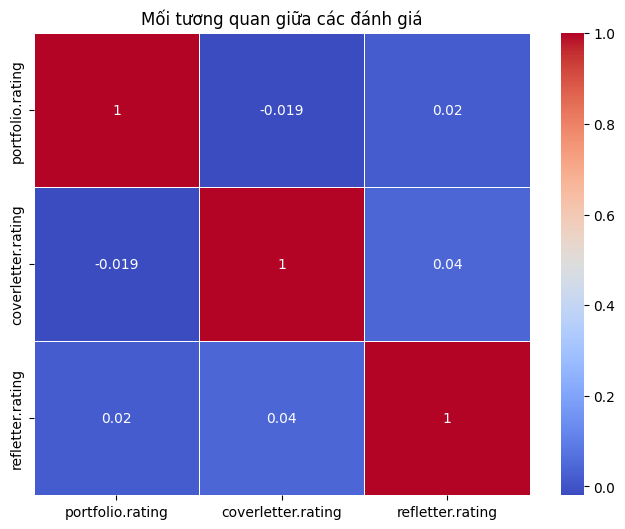

In [165]:
#Task2.7
correlation_matrix = df[['portfolio.rating', 'coverletter.rating', 'refletter.rating']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mối tương quan giữa các đánh giá")
plt.show()

In [166]:
#Task2.8
print("Observations:")
print("- Some attributes had more than 50% missing values and were removed to ensure data quality.")
print("- The distribution of grades shows that some subjects have higher average scores than others.")
print("- The pie chart indicates that a few nationalities dominate the dataset, while others are less represented.")
print("- The bar chart reveals a possible difference in average grades between male and female students.")
print("- The heatmap suggests a positive correlation between different rating attributes (portfolio, cover letter, reference letter).")

Observations:
- Some attributes had more than 50% missing values and were removed to ensure data quality.
- The distribution of grades shows that some subjects have higher average scores than others.
- The pie chart indicates that a few nationalities dominate the dataset, while others are less represented.
- The bar chart reveals a possible difference in average grades between male and female students.
- The heatmap suggests a positive correlation between different rating attributes (portfolio, cover letter, reference letter).


In [167]:
#Task2.8
print("Observations:")
print("- Some attributes had more than 50% missing values and were removed to ensure data quality.")
print("- The distribution of grades shows that some subjects have higher average scores than others.")
print("- The pie chart indicates that a few nationalities dominate the dataset, while others are less represented.")
print("- The bar chart reveals a possible difference in average grades between male and female students.")
print("- The heatmap suggests a positive correlation between different rating attributes (portfolio, cover letter, reference letter).")

Observations:
- Some attributes had more than 50% missing values and were removed to ensure data quality.
- The distribution of grades shows that some subjects have higher average scores than others.
- The pie chart indicates that a few nationalities dominate the dataset, while others are less represented.
- The bar chart reveals a possible difference in average grades between male and female students.
- The heatmap suggests a positive correlation between different rating attributes (portfolio, cover letter, reference letter).


In [168]:
#Task2.8
print("Observations:")
print("- Some attributes had more than 50% missing values and were removed to ensure data quality.")
print("- The distribution of grades shows that some subjects have higher average scores than others.")
print("- The pie chart indicates that a few nationalities dominate the dataset, while others are less represented.")
print("- The bar chart reveals a possible difference in average grades between male and female students.")
print("- The heatmap suggests a positive correlation between different rating attributes (portfolio, cover letter, reference letter).")

Observations:
- Some attributes had more than 50% missing values and were removed to ensure data quality.
- The distribution of grades shows that some subjects have higher average scores than others.
- The pie chart indicates that a few nationalities dominate the dataset, while others are less represented.
- The bar chart reveals a possible difference in average grades between male and female students.
- The heatmap suggests a positive correlation between different rating attributes (portfolio, cover letter, reference letter).
